## OB1 performance on the flanker task and the sentence task

In [1306]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns

### Analysis OB1 activation on Flanker Experiment

In [1307]:
df = pd.read_pickle("E:/Projects/2020_reading/OB1_SAM/alldata_Flanker.pkl")
df.head(-30)


,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,attentional width,exact recognized words positions,exact recognized words,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position
0,lent,lent,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.525...","[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2,2,0.912891,0.961421,0,[1075],[0],[]
1,oeuf,oeuf,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.156...","[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2,2,0.897499,1.131298,0,[1075],[0],[]
2,onde,onde,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.548...","[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2,2,0.941790,0.642465,0,[1075],[0],[]
3,mime,mime,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.313...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.864...","[0, 0, 0, 0, 0, 0, 0, 0, 1.704580732828302, 1....","[0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, ...",[],"[[], [], [], [], [], [], [], [], [], [], [340]...","[[], [], [], [], [], [], [], [], [], [], [me],...",2,2,0.933279,0.736396,0,[1075],[0],[]
4,pain,pain,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.753...","[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",2,2,0.837090,1.798029,0,[675],[1],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,truc plie truc,plie,word/unrelated,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.797...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.677...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6977205695174615, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 1...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",7,7,0.949706,0.555094,0,[1075],[0],[]
686,muse nain muse,nain,word/unrelated,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.797...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.313...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6977205695174615, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 12, 1...",[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...",7,7,0.908965,1.004751,0,[1075],[0],[]
687,gain moue gain,moue,word/unrelated,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.797...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0,

In [1308]:
behav2plot = df.copy(deep=True)
behav2plot['condition'] = behav2plot['condition'].str[5:]

behav2plot['RT'] = behav2plot['reaction time'].str[0]
behav2plot['correct'] = behav2plot['correct'].str[0]

conditiondict = {"no": "no-flank", "related":"repetition"}
behav2plot["condition"].replace(conditiondict, inplace=True)


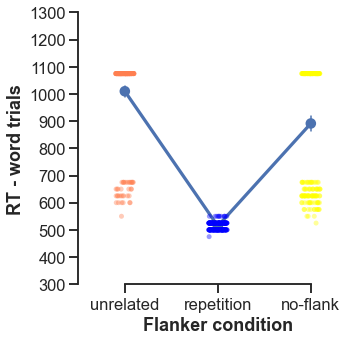

In [1309]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


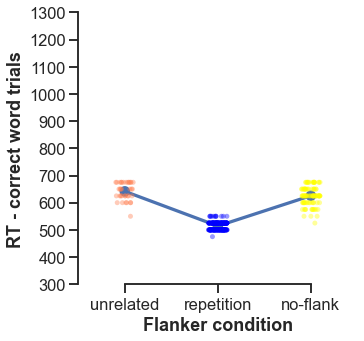

In [1310]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))
cor2plot = behav2plot.copy(deep=True)
cor2plot = cor2plot[cor2plot['correct']==1]

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="RT",
              data=cor2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="RT", 
              data=cor2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)

ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("RT - correct word trials",fontdict=dict(weight='bold'))
ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


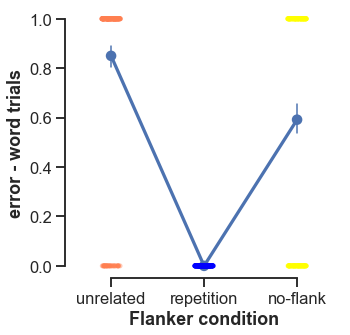

In [1311]:
error = {1:0, 0:1}
behav2plot['error'] = behav2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# Show each observation with a scatterplot
sns.stripplot(x="condition", y="error",
              data=behav2plot, dodge=False, jitter=True,order=["unrelated", "repetition","no-flank"],
              palette=["coral", "blue", "yellow"],
              alpha=.4)

# Show the conditional means
sns.pointplot(x="condition", y="error", 
              data=behav2plot, dodge=.05, join=True,errwidth=1.5,ci=95,
                scale=0.8,order=["unrelated", "repetition","no-flank"],bw=.2)
ax.set_xlabel("Flanker condition",fontdict=dict(weight='bold'))
ax.set_ylabel("error - word trials",fontdict=dict(weight='bold'))
ax.set_yticks([0, 0.2, 0.4,0.6, 0.8, 1.0])

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Plot target and lexicon activations in the model 

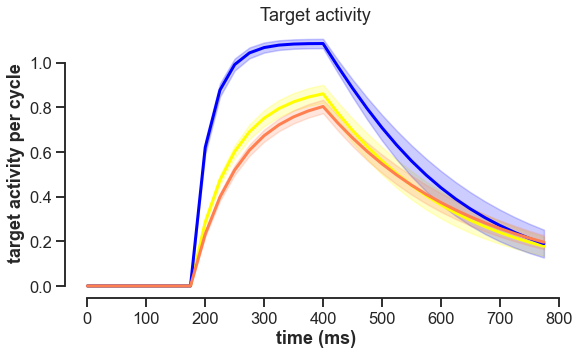

In [1312]:
target2plot = df.copy(deep=True)
#data2plot = data2plot[data2plot['condition'].str.startswith(('word'))]

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci='sd',  linewidth=3, palette=["yellow", "blue", "coral"], legend=False)

ax.set_title("Target activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



### Lexicon activations 

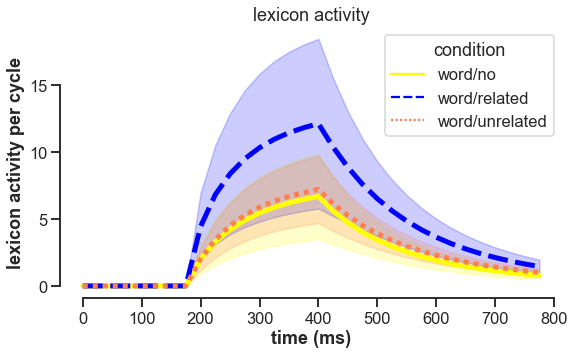

In [1313]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle",hue = "condition", style= "condition",color ='black' , ci='sd',  linewidth=5,palette=["yellow", "blue", "coral"], legend=True)

ax.set_title("lexicon activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



In [1278]:
lexicon2plot.head(2)
lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

,trial,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,cycle nr,time,bin
16,0,lent,lent,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",6.036840,"[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",...,2,0.912891,0.961421,0,[1075],[0],[],16,400,6
48,1,oeuf,oeuf,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",3.861943,"[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",...,2,0.897499,1.131298,0,[1075],[0],[],16,400,3
80,2,onde,onde,word/no,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.282...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",12.025873,"[0, 0, 0, 0, 0, 0, 0, 0, 1.7045807328283022, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, ...",...,2,0.941790,0.642465,0,[1075],[0],[],16,400,10


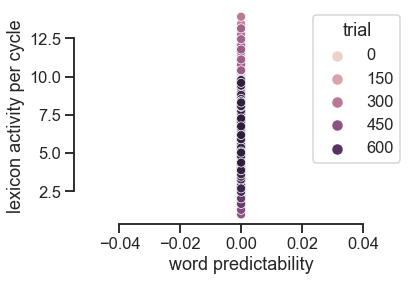

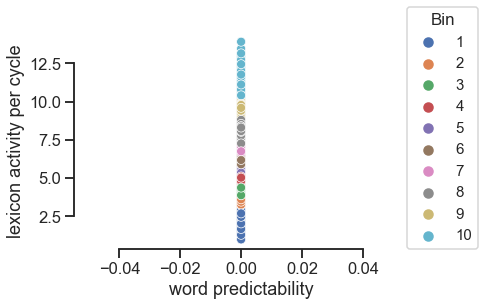

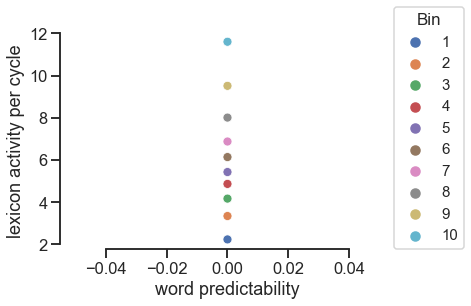

In [1279]:

sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('E:/Projects/2020_reading/Flankerlexicon.pkl')
lexicon_peak.head(3)

### bigram activations 

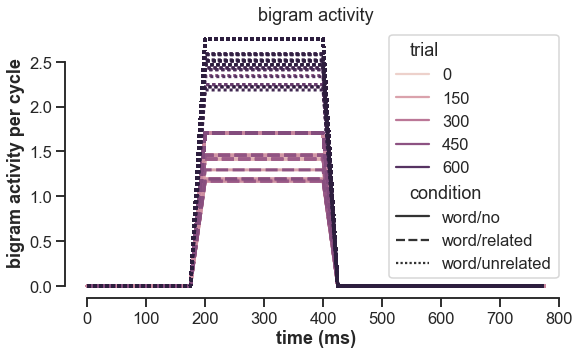

In [1280]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



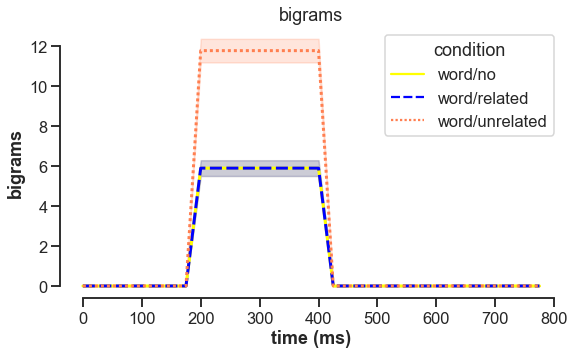

In [1281]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 720
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition", style="condition",color ='black' , ci='sd',  linewidth=3,
             palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




### OB1 performance on the sentence reading task (experiment 2)

In [1284]:
df = pd.read_pickle("E:/Projects/2020_reading/OB1_SAM/alldata_Sentence.pkl")
df.head(3)


,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,attentional width,...,exact recognized words,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr
0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.944...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 1...",[],...,"[[], [], [], [], [], [], [], [], [], [], [], [...",9,9,0.637734,3.998309,0,[1075],[0],1,1
1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.968...","[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",[],...,"[[], [], [], [], [], [], [], [], [], [], [], [...",9,9,1.000000,0.000000,0,[1075],[0],1,2
2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.377...","[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 1...",[],...,"[[], [], [], [], [], [], [], [], [], [], [est]...",8,8,0.844727,1.713742,0,[1075],[0],1,3


In [1285]:
data2plot = df.copy(deep=True)
data2plot['RT'] = df['reaction time'].str[0]
data2plot['correct'] = df['correct'].str[0]
data2plot['position'] = df['position'].astype(str)

In [1286]:
data2plot.head(300)

,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,attentional width,...,eye position,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,RT
0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.944...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 1...",[],...,9,9,0.637734,3.998309,0,[1075],0,1,1,1075
1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.968...","[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",[],...,9,9,1.000000,0.000000,0,[1075],0,1,2,1075
2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.377...","[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 1...",[],...,8,8,0.844727,1.713742,0,[1075],0,1,3,1075
3,votre reine était bonne,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.769...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.643...","[0, 0, 0, 0, 0, 0, 0, 0, 4.75569728856892, 4.7...","[0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 3...",[],...,11,11,1.000000,0.000000,0,[1075],0,1,4,1075
4,votre roi était grand,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.678...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.917...","[0, 0, 0, 0, 0, 0, 0, 0, 4.618545281671758, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 3...",[],...,10,10,1.000000,0.000000,0,[1075],0,1,5,1075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,danse amie bien son,amie,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.831...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.693...","[0, 0, 0, 0, 0, 0, 0, 0, 4.111715006529428, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 23, 23, 23, 2...",[],...,9,9,0.811410,2.081455,0,[575],1,2,96,575
296,bien aimes vivre tu,aimes,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.665...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.726...","[0, 0, 0, 0, 0, 0, 0, 0, 4.290574392450095, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 23, 23, 23, 23, 23, 2...",[],...,9,9,0.797823,2.231419,0,[600],1,2,97,600
297,dit vous ils ont,vous,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.743...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.518...","[0, 0, 0, 0, 0, 0, 0, 0, 3.314658236895719, 3....","[0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 1...",[],...,8,8,0.625512,4.133210,0,[525],1,2,98,525
298,bons è amis nous,è,scrambled,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.728...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.930...","[0, 0, 0, 0, 0, 0, 0, 0, 3.016702587514154, 3....","[0, 0, 0, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 1...",[],...,8,8,1.000000,0.000000,0,[1075],0,2,99,1075


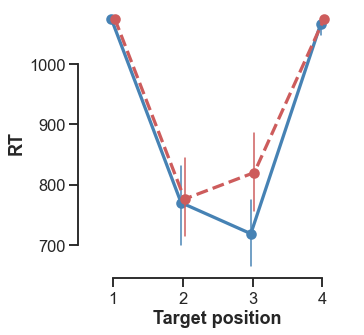

In [1287]:
# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="RT", hue="condition",
#               data=data2plot, dodge=False, jitter=True, 
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="RT", hue="condition", linestyles=['-', '--'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5, palette = ['steelblue', 'indianred'],
                scale=0.8,order=["1", "2","3","4"],bw=.2)

#sns.lineplot(x="position", y="RT",
 #             data=data2plot)

ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("RT",fontdict=dict(weight='bold'))
# ax.set_yticks([300, 400, 500,600, 700, 800, 900, 1000, 1100, 1200, 1300])
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)





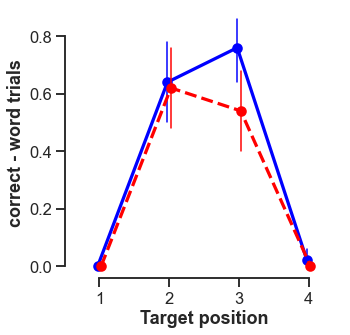

In [1288]:
error = {1:0, 0:1}
data2plot['error'] = data2plot["correct"].replace(error, inplace=False)

# Initialize the figure
f, ax = plt.subplots(figsize=(5,5))

# # Show each observation with a scatterplot
# sns.stripplot(x="position", y="error",  hue="condition",
#               data=data2plot, dodge=False, jitter=True,
#               alpha=.4)

# Show the conditional means
sns.pointplot(x="position", y="correct", hue="condition", linestyles=['-', '--'],palette=['blue', 'red'],
              data=data2plot, dodge=.05, join=True,errwidth=1.5,
                scale=0.8,order=["1", "2","3","4"],bw=.2)

# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xlabel("Target position",fontdict=dict(weight='bold'))
ax.set_ylabel("correct - word trials",fontdict=dict(weight='bold'))
ax.legend_.remove()

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


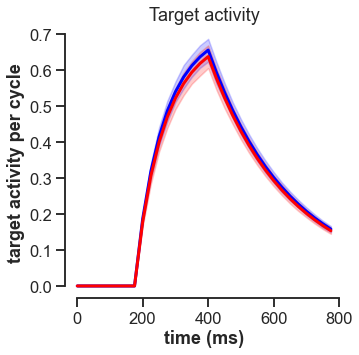

In [1289]:
target2plot = df.copy(deep=True)

target2plot = target2plot.explode('target activity per cycle')
target2plot = target2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
target2plot["cycle nr"] = m
target2plot['time']= target2plot['cycle nr']*25


target2plot["target activity per cycle"] = pd.to_numeric(target2plot["target activity per cycle"].str[0], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=target2plot, x="time", y="target activity per cycle", hue = "condition",color ='black' , ci=95,  linewidth=3, palette = ['blue', 'red'], legend=False)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("target activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Target activity")

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


### Then for lexicon

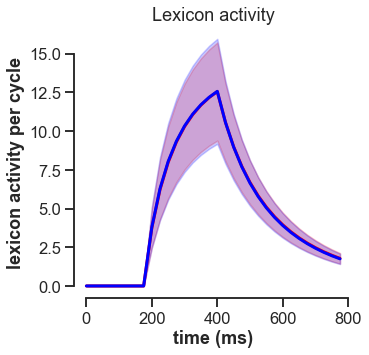

In [1290]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", palette = ['red','blue'], legend=False,color ='black' , ci='sd',  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


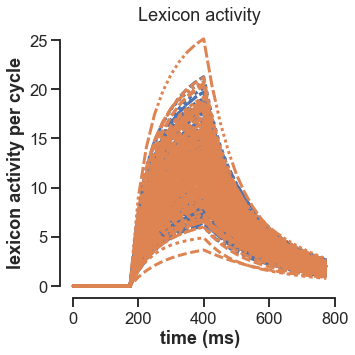

In [1291]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('lexicon activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= lexicon2plot['cycle nr']*25


lexicon2plot["lexicon activity per cycle"] = pd.to_numeric(lexicon2plot["lexicon activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(5,5))

sns.lineplot(data=lexicon2plot, x="time", y="lexicon activity per cycle", hue = "condition", style="trial", legend=False,color ='black' , ci=95,  linewidth=3)

ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("lexicon activity per cycle",fontdict=dict(weight='bold'))
ax.set_title("Lexicon activity")


sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)


In [1292]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [1293]:
lexicon_peak.head(30)


,trial,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",13.691006,"[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 1...",...,9,0.637734,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",13.571547,"[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",...,9,1.000000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",12.389297,"[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 1...",...,8,0.844727,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.769...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",15.601159,"[0, 0, 0, 0, 0, 0, 0, 0, 4.75569728856892, 4.7...","[0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 3...",...,11,1.000000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.678...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",10.863239,"[0, 0, 0, 0, 0, 0, 0, 0, 4.618545281671758, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 3...",...,10,1.000000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.630...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",9.011929,"[0, 0, 0, 0, 0, 0, 0, 0, 4.073404252486029, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25, 25, 2...",...,10,0.844727,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.806...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",11.448252,"[0, 0, 0, 0, 0, 0, 0, 0, 3.113135533678675, 3....","[0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 1...",...,8,0.844727,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.683...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",10.873533,"[0, 0, 0, 0, 0, 0, 0, 0, 3.86650388133639, 3.8...","[0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 2...",...,9,0.762273,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.679...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",14.752009,"[0, 0, 0, 0, 0, 0, 0, 0, 4.295957473203527, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",...,9,0.755468,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.743...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",18.304283,"[0, 0, 0, 0, 0, 0, 0, 0, 3.314658236895719, 3....","[0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 1...",...,8,0.755468,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",13.691006,"[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 1...",...,0.637734,3.998309,0,[1075],[0],1,1,16,400,7
48,1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",13.571547,"[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",...,1.000000,0.000000,0,[1075],[0],1,2,16,400,7
80,2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....",12.389297,"[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 1...",...,0.844727,1.713742,0,[1075],[0],1,3,16,400,5


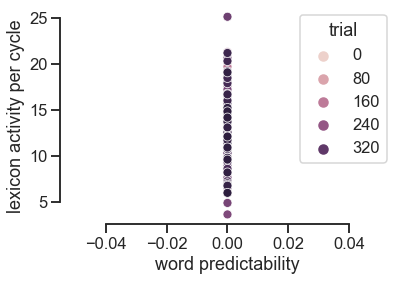

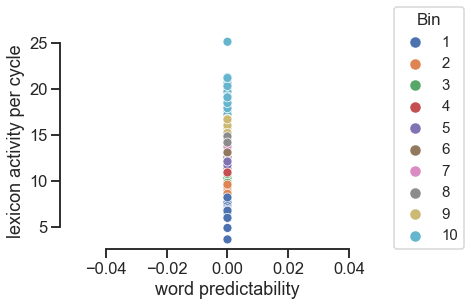

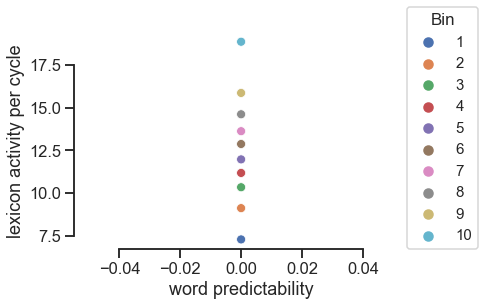

In [1294]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['lexicon activity per cycle'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="lexicon activity per cycle", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('E:/Projects/2020_reading/Sentencelexicon.pkl')
lexicon_peak.head(3)

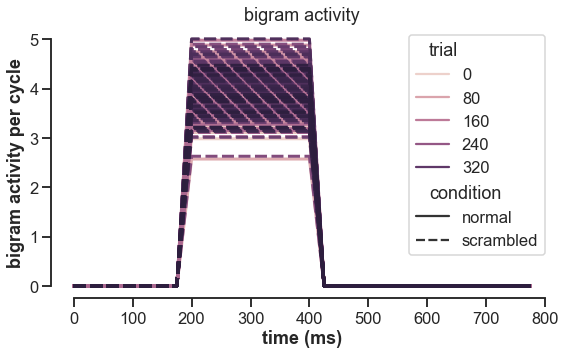

In [1295]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "trial", style='condition',color ='black' , ci='sd',  linewidth=3,
             #palette=["yellow", "blue", "coral"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



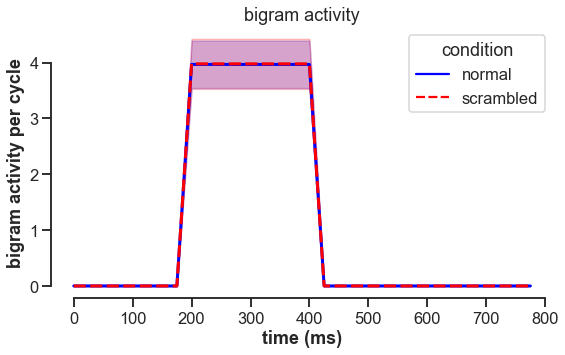

In [1296]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('bigram activity per cycle')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["bigram activity per cycle"] = pd.to_numeric(lexicon2plot["bigram activity per cycle"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="bigram activity per cycle", hue = "condition", style='condition',color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigram activity")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigram activity per cycle",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)



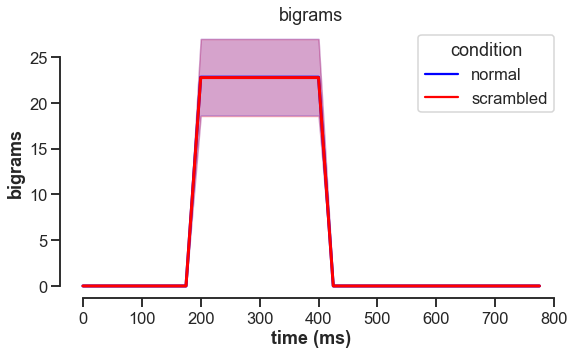

In [1297]:
lexicon2plot = df.copy(deep=True)

lexicon2plot = lexicon2plot.explode('ngrams')
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})

# initializing list of lists 
test_list = list(range(32))
# declaring magnitude of repetition 
K = 400
  
# using list comprehension 
# repeat elements K times 
m =  K*test_list
lexicon2plot["cycle nr"] = m
lexicon2plot['time']= (lexicon2plot['cycle nr'])*25


lexicon2plot["ngrams"] = pd.to_numeric(lexicon2plot["ngrams"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.lineplot(data=lexicon2plot, x="time", y="ngrams", hue = "condition",color ='black' , ci='sd',  linewidth=3,
             palette=["blue", "red"], legend=True
            )

ax.set_title("bigrams")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("bigrams",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




In [1298]:
lexicon2plot.head(2)

lexicon_peak = lexicon2plot[(lexicon2plot['time']>=400) & (lexicon2plot['time']<= 402)].copy(deep=True)

In [1299]:
lexicon_peak.head(30)


,trial,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time
16,0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.944...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...",19.0,...,9,0.637734,3.998309,0,[1075],[0],1,1,16,400
48,1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.968...","[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....",24.0,...,9,1.000000,0.000000,0,[1075],[0],1,2,16,400
80,2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.377...","[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...",14.0,...,8,0.844727,1.713742,0,[1075],[0],1,3,16,400
112,3,votre reine était bonne,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.769...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.643...","[0, 0, 0, 0, 0, 0, 0, 0, 4.75569728856892, 4.7...",32.0,...,11,1.000000,0.000000,0,[1075],[0],1,4,16,400
144,4,votre roi était grand,votre,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.678...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.917...","[0, 0, 0, 0, 0, 0, 0, 0, 4.618545281671758, 4....",32.0,...,10,1.000000,0.000000,0,[1075],[0],1,5,16,400
176,5,ton homme sera jeune,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.630...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.465...","[0, 0, 0, 0, 0, 0, 0, 0, 4.073404252486029, 4....",25.0,...,10,0.844727,1.713742,0,[1075],[0],1,6,16,400
208,6,ton cou est gros,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.806...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.916...","[0, 0, 0, 0, 0, 0, 0, 0, 3.113135533678675, 3....",15.0,...,8,0.844727,1.713742,0,[1075],[0],1,7,16,400
240,7,elles sont avec lui,elles,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.683...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.777...","[0, 0, 0, 0, 0, 0, 0, 0, 3.86650388133639, 3.8...",21.0,...,9,0.762273,2.623776,0,[1075],[0],1,8,16,400
272,8,cet ours mange tout,cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.679...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.482...","[0, 0, 0, 0, 0, 0, 0, 0, 4.295957473203527, 4....",24.0,...,9,0.755468,2.698892,0,[1075],[0],1,9,16,400
304,9,cet ours vit ici,cet,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.743...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.627...","[0, 0, 0, 0, 0, 0, 0, 0, 3.314658236895719, 3....",15.0,...,8,0.755468,2.698892,0,[1075],[0],1,10,16,400


,trial,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,...,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,cycle nr,time,bin
16,0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.944...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...",19.0,...,0.637734,3.998309,0,[1075],[0],1,1,16,400,2
48,1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.968...","[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....",24.0,...,1.000000,0.000000,0,[1075],[0],1,2,16,400,6
80,2,ton mec est vert,ton,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.914...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.377...","[0, 0, 0, 0, 0, 0, 0, 0, 2.9860118042533634, 2...",14.0,...,0.844727,1.713742,0,[1075],[0],1,3,16,400,1


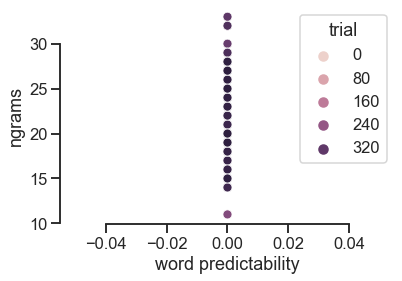

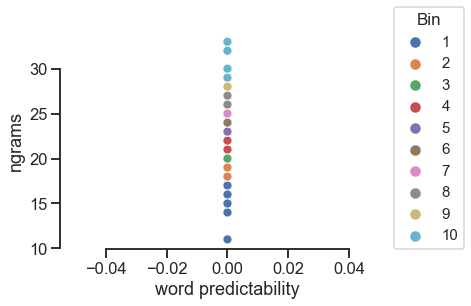

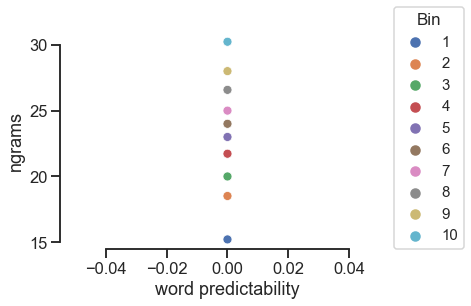

In [1300]:
#lexicon_peak
sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "trial",
               )

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

bin_labels_10 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
lexicon_peak['bin'] = pd.qcut(lexicon_peak['ngrams'],
                              q=10,
                              labels=bin_labels_10)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak,  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

plt.figure()
scat = sns.scatterplot(data=lexicon_peak.groupby(['bin']).mean(),  x="word predictability", y="ngrams", hue = "bin",
                #color ='black',
            #kind="line", ci=95,  linewidth=3
               )

scat.legend(fontsize = 15, \
               bbox_to_anchor= (1.23, 1.15), \
               title="Bin", \
               title_fontsize = 17, \
               shadow = False, \
               facecolor = 'white');

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)

lexicon_peak.to_pickle('E:/Projects/2020_reading/Sentencelexicon_ngrams.pkl')
lexicon_peak.head(3)

In [1301]:
lexicon2plot = df.copy(deep=True)
lexicon2plot['stripped']= lexicon2plot['stimulus'].str.replace(" ","")
lexicon2plot['nletters']= lexicon2plot['stripped'].str.len()

#(lexicon2plot['stimulus'].str.strip()).len(
lexicon2plot.head(2)


,stimulus,target,condition,cycle,stimulus activity per cycle,target activity per cycle,lexicon activity per cycle,bigram activity per cycle,ngrams,attentional width,...,attention position,word threshold,word frequency,word predictability,reaction time,correct,position,item_nr,stripped,nletters
0,les vers sont loin,les,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.781...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.944...","[0, 0, 0, 0, 0, 0, 0, 0, 3.6786236631007108, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 1...",[],...,9,0.637734,3.998309,0,[1075],[0],1,1,lesverssontloin,15
1,ces loups vont voir,ces,normal,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.672...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.968...","[0, 0, 0, 0, 0, 0, 0, 0, 4.338404220876723, 4....","[0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 2...",[],...,9,1.000000,0.000000,0,[1075],[0],1,2,cesloupsvontvoir,16


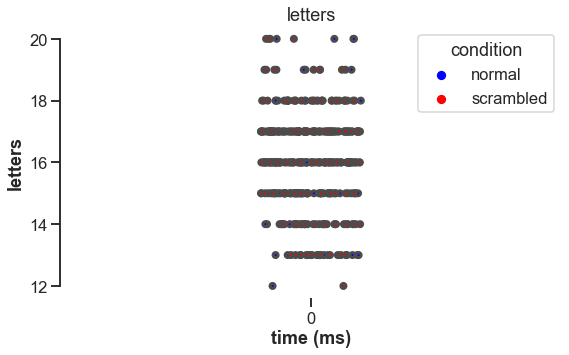

In [1302]:


lexicon2plot["nletters"] = pd.to_numeric(lexicon2plot["nletters"], downcast="float")
f, ax = plt.subplots(figsize=(9,5))

sns.stripplot(data=lexicon2plot, x="word predictability", y="nletters", hue = "condition",  linewidth=3,
             palette=["blue", "red"], dodge=False, jitter=True,
            )

ax.set_title("letters")
ax.set_xlabel("time (ms)",fontdict=dict(weight='bold'))
ax.set_ylabel("letters",fontdict=dict(weight='bold'))

sns.set(style="ticks")
sns.set_context('talk')
sns.color_palette("Paired")
sns.despine(offset=0, trim=True)




In [1303]:
lexicon2plot = lexicon2plot.reset_index().rename(columns={'index': 'trial'})


In [1304]:
lexicon2plot.head(20)

lexicon_peak = lexicon2plot.copy(deep=True)

In [1305]:
lexicon_peak.head(30)
lexicon_peak.to_pickle('E:/Projects/2020_reading/Sentencelexicon_nletters.pkl')
